##Population Genetics

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


To simulate the genetic drift, I will create a function that takes in the number of population, the number of population and the population size as arguments. The total number of alleles will be the size of the population * 2, assuming each fly carries two alleles. 

Like the Buri experiment where generation 0 has the same number of red-eyed flies and white-eye flies, I will set the current frequency of alleles to be 0.5 to represent the initial frequency of equal number of red alleles and white alleles. 

To record the allele frequency of each population across generations, I will use a nested for loop, where the inner loop fills out the frequencies of each generation, and the outer loop repeat the process for the number of populations. 

Since arrays in Python are zero-indexed and the range function is exclusive, the inner loop only starts at 1 and ends at the number of generations + 1. The zero-th generation has been prefilled with frequency 0.5.

For each generation, I call the np.random.rand to simulate the random event that a parent pass down the allele to the children. I will keep track of the number of the red alleles passed down using a counter. I 
current frequency is a red allele being passed down. I will go through the list of randomly generated allele frequencies, and if I find a value less than the current frequency, I increment the counter. 

At the end of each simulation for one generation, I will update the current frequency by dividing the number of red alleles by the total number of alleles. I will save this allele frequency as an entry in the matrix, and since I have prepopulated the first generation with the frequency of 0.5, I will add 1 to the column representing the generation.

This curreent frequency will be used in future generations in the comparison, so overtime, it is likely for the allele frequency of the population to shift to the extreme. 


In [ ]:
def simulate_genetic_drift(num_populations, num_generations, num_of_flies):
  
  total_alleles = num_of_flies * 2
  #initialize 2D array
  frequency_array = np.zeros((num_populations, num_generations + 1))

  for i in range(num_populations):
    #in the first generation of each population, half the alleles are red
    frequency_array[i, 0] = 0.5
    current_frequency = 0.5
    for j in range(1, num_generations+1): 
      #random event if a parent is passing a red allele
      allele_frequency = np.random.rand(total_alleles)
      red_allele_count = 0
      #compare random generated allele frequency with the current frequency
      for k in range(total_alleles):
        if allele_frequency[k] < current_frequency:
          red_allele_count += 1
      current_frequency = red_allele_count /total_alleles
      #set the allele frequen
      frequency_array[i, j] = current_frequency

  return frequency_array
   

To plot the histograms, I will define a helper function plot_histogram() which takes in a list of generation numbers and a 2D array of allele frequencies. I will loop through the generation time points we wish to generate histograms for and create a new plot using plt.subplots(). 

To get the data points, I use the colon to grab all the frequencies values of all populations across one row of generation, and divide the datapoints across 10 bins.

I will proceed to set the ticks and label the axes and the histogram based on the generation. Later I will call this method to plot histograms for 
generation 0, 1, 10 and 19.


In [ ]:
def plot_histogram(generation_time_points, frequency_array, x_label, y_label, title):
  for i in range(len(generation_time_points)):
    fig, ax = plt.subplots(figsize = (5, 3))
    #take values allele frequencies of all populations at generation i
    #and distribute the values across 10 bins
    ax.hist(frequency_array[:, generation_time_points[i]], bins=10)
    #set ticks on the axes
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(xmin=0, xmax = 1)
    #Label axes and give plot a title
    plt.title(title + ' over generation ' + str(generation_time_points[i]), fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)


I am initializing a list of time points that I am interested in, and populating the random frequency array across generations using the simulate_genetic_drift() function from earlier. 

I will pass the list of generations and the 2D array of allele frequencies to the plot_histogram() function. 

This way I can see how most populations experience a genetic drift overtime. Initially, the frequency of all 107 populations is 0.5. After one generation, the frequencies of alleles across populations deviates slightly away from the 0.5 initial frequency. 

As the generations increase, I see the allele frequencies across populations varies widely, and the majority of populations have extreme frequencies of either 0 or 1. 


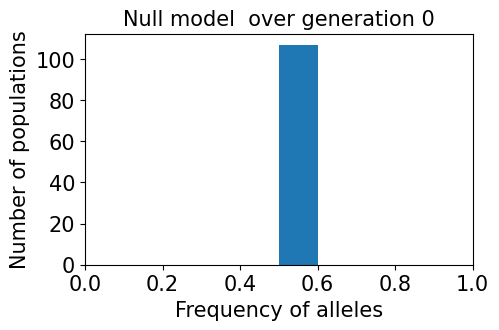

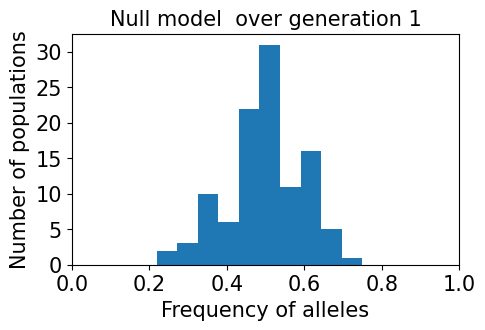

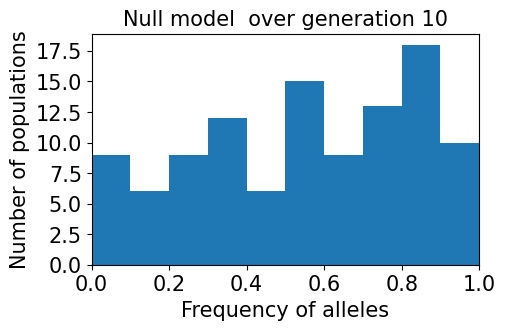

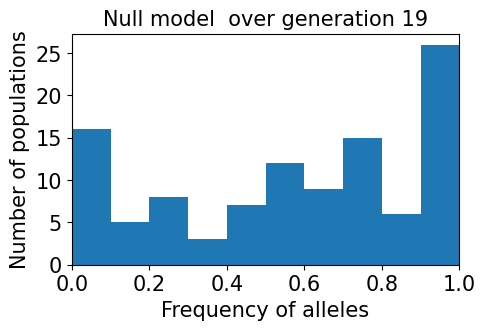

In [ ]:
#generations for plotting histograms
generation_time_points = [0, 1, 10, 19]
#generate allele frequencies through 19 generations of 107 flasks each with 16 flies
frequency_array = simulate_genetic_drift(107, 19, 16);
#pass the 2d array of allele frequencies to the helper function that plots the histograms
plot_histogram(generation_time_points, frequency_array, "Frequency of alleles", "Number of populations", "Null model ")


## Question 1d

For plotting the mean time to fixation, I define a function to plot a scatter plot that takes in a frequency array, an array of population sizes, the number of populations, and an empty array to store the first generation that each population reach fixation. 

Inside the function, I am calling the function simulate_genetic_drift from part 1c by passing in the number of populations = 107 and the number of the generations = 1000. To find the time point for each population at which the allele frequency becomes either zero or one, I use the np.where function which tells me at which entry of the array the frequency is 0 or 1, and I will take the min of that to get the first generation where the fixation occur. I will store this value to an array of generation fixation points.

With the time points of fixation, I can use the scatter() function to generate a scatter plot of points with the x-coordinate corresponding to the population size, and the y-coordinate corresponding to the first generation where the population has reached a fixation point.




In [ ]:
def plot_scatter(frequency_array, population_size, num_populations, fixation_generation):
  #loop through the population size
  for i in range(len(population_size)):
    #simulate genetic drift for each varying population size
    frequency_array = simulate_genetic_drift(num_populations=107, num_generations=1000, num_of_flies=population_size[i])
    #determine the first generation where the fixation point happened
    fixation_generation[i] = np.min(np.where((frequency_array[i] == 0) | (frequency_array[i] == 1)))
  #plot
  fig, ax = plt.subplots()
  plt.xlabel('Population size ', fontsize=15)
  plt.ylabel('Generation elasped', fontsize=15)
  plt.scatter(population_size, fixation_generation)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)




I am initializing an array to store the population sizes, and the size of the array is the number of populations, which is also the size of the array that stores the first generation where the fixation occurs. 

From the plot, I observe that as the size of the population grows, it takes a longer time for the population to reach fixation. 
To get the mean time to fixation, I take the sum of all the generations and divide that by the number of populations. 

Mean time to fixation: 32.4


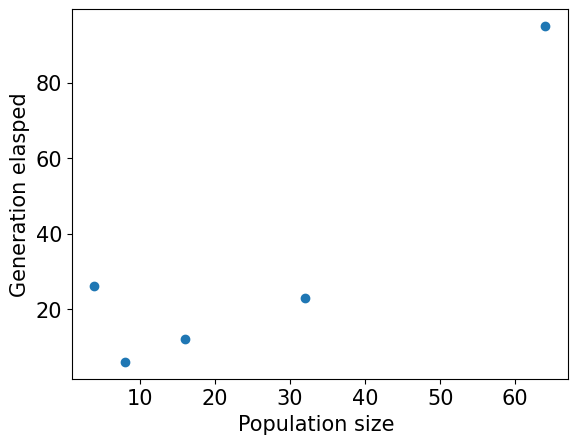

In [ ]:
population_size = [4, 8, 16, 32, 64]
num_populations = 5
#initialize an array to store the first generation where the fixation point occurs 
fixation_generation = np.zeros(num_populations)

plot_scatter(frequency_array, population_size, num_populations, fixation_generation)
mean_time = np.sum(fixation_generation)/num_populations
print("Mean time to fixation: " + str(mean_time))

## Question 1e

I will define a function to simulate the effect of mutation that takes in the mutation probability, the number of populations, the number of generations, and the population size. The initialization of the frequency array and generating random allele frequencies is similar to my simulate_genetic_drift function in 1c.

Additionally, I call random.rand() on the number of red alleles and white, which gives me a probability of the allele being flipped, and if this probability is smaller than the mutation probability of 0.001, the allele mutates. I update the new number of red alleles by subtracting those that mutates from red to white and add those that mutates from white to red. This gives me the number of red alleles with mutation, which I will divide by the total number of alleles to give me the frequency of red alleles with mutation. 

I will update the current frequency by taking this new red allele count and store the value in the frequency array.  

In [ ]:
def stochastic_simulation_with_mutation(mutation_prob, num_populations, num_generations, num_of_flies):
  total_alleles = num_of_flies * 2
  #initialize 2D array
  frequency_array = np.zeros((num_populations, num_generations))
  for i in range(num_populations):
    #in the first generation of each population, half the alleles are red
    frequency_array[i, 0] = 0.5
    current_frequency = 0.5
    for j in range(num_generations - 1): 
      #random event if a parent is passing a red allele
      allele_flip = np.random.rand(total_alleles)

      #Count of red alleles that stay in this population
      red_allele_count = np.sum(allele_flip < frequency_array[i, j])

      ## Plot twist: another coin flip implements mutation, now agnostic of previous generation's frequency
      mut_flips_red_to_white = np.random.rand(red_allele_count);
      mut_flips_white_to_red = np.random.rand(total_alleles-red_allele_count);

      #Count the number of alleles that mutates in that generation
      num_mut_from_red_to_white = np.sum(mut_flips_red_to_white < mutation_prob);
      num_mut_from_white_to_red = np.sum(mut_flips_white_to_red < mutation_prob);

      #Recalculates the total number of red alleles after mutation
      red_allele_count = red_allele_count - num_mut_from_red_to_white + num_mut_from_white_to_red
      current_frequency = red_allele_count /total_alleles
      frequency_array[i, j+1] = current_frequency
      
  return frequency_array


To plot the allele frequency over time, I will define a function plot_line_graph that takes in the frequency array, the number of population, the title, the x label and y label. I will loop through the number of populations to get the allele frequency and plot the allele frequencies across all generations. 

In [ ]:
def plot_line_graph(frequency_array, num_populations, title, x_label, y_label):
  #generate the plot
  fig, ax = plt.subplots()

  #set title for plot and label axes
  plt.title(title, fontsize=17)
  plt.xlabel(x_label, fontsize=15)
  plt.ylabel(y_label, fontsize=15)

  #loop through the number of populations, get all the allele frequencies, and plot the values as datapoints
  for p in range(num_populations):
    plt.plot(frequency_array[p, :], '-', alpha=0.8)

  #set x and y ticks
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)



Using, the two functions defined above, I can generate the frequency array from running a stochastic simulation over 1000 generations with a mutation probability = 0.001. To visualize the 
I see even when the allele frequency is 1, there is a downward spike near the 200th generation, and when the allele frequency is 0, there is a spike near the 950th generation. This is evidence for the effect of mutation, since in the null model, when the allele frequency reaches 0 or 1, the population reaches a fixation point. However, with mutation, the dominant allele can mutate and the recessive allele is brought back to the population.


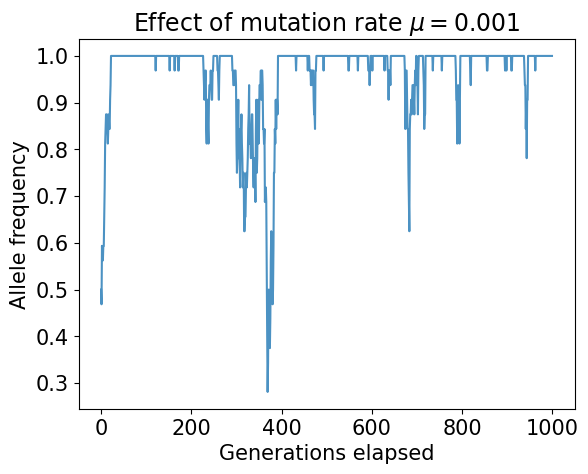

In [ ]:
frequency_array_with_mutation = stochastic_simulation_with_mutation(mutation_prob=0.001, num_populations=1, num_generations=1000, num_of_flies=16)
plot_line_graph(frequency_array_with_mutation, 1, title="Effect of mutation rate $\mu =0.001$", x_label="Generations elapsed", y_label="Allele frequency")


## Question 1f

I will create an array generation_time_points to store the representative time points for plotting the histograms. Next I will generate the frequency array with mutation by calling the function above and then passing the array of representative generation time points and the frequency array to the plot_histogram function. 

From the plots, I see that at generation 0, both the null model and the model with mutation start with the same allele frequency equalling to 0.5. With no mutation, most populations arrive at a fixation point much earlier. At generation 19, most populations in the null model have allele frequencies 0 or 1. 

However, with mutation, the time it takes for the populations to reach a fixation is much longer. At generation 10, the distribution of populations is still centered around the original frequency. Even after 500 generations when most populations have extreme values of frequencies, there are still populations with allele frequencies in the middle range due to the mutation rate bringing back the recessive allele to the population.


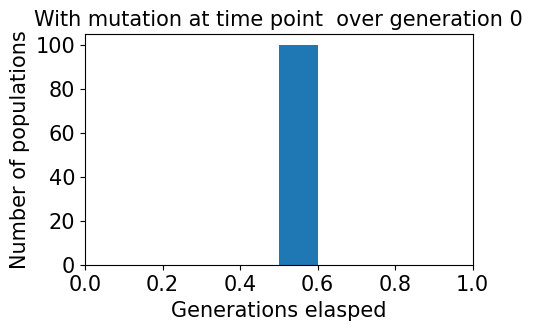

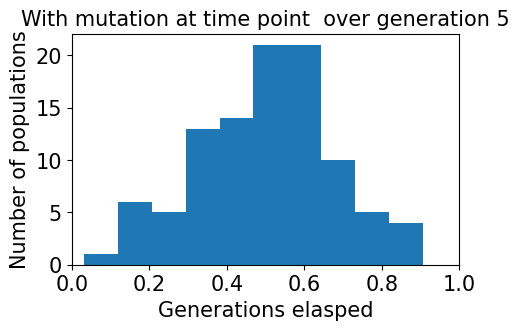

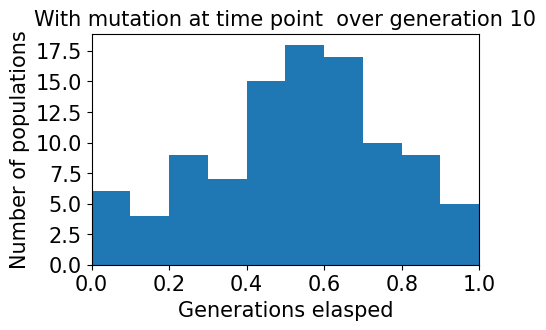

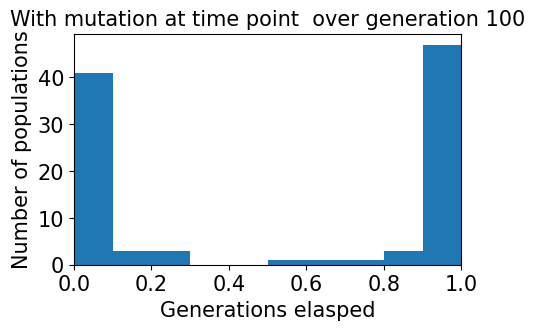

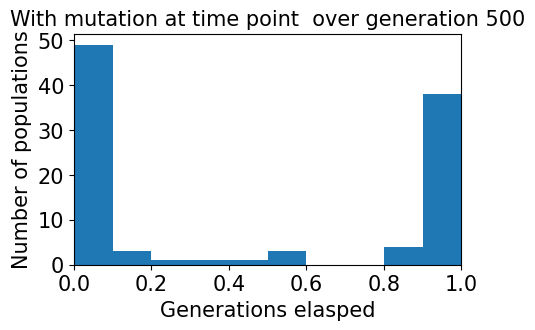

In [ ]:
generation_time_points = [0, 5, 10, 100, 500]
frequency_array_with_mutation = stochastic_simulation_with_mutation(mutation_prob=0.001, num_populations=100, num_generations=501, num_of_flies=16)
plot_histogram(generation_time_points, frequency_array_with_mutation, x_label="Generations elasped", y_label="Number of populations", title="With mutation at time point ")


To plot 10 trajectories to track the allele frequencies over generations of 10 populations, I define another function that loops through the number of pop and plot all the frequencies over all generations of that population. I also added the legend using plt.legend that displays the y labels for each line. 

To compare the frequencies of the null model, I also plot a line graph using the frequency array generated by simulation without mutation.

From the two graphs, I see that in the null model, the population reaches fixation earlier before generation 100. Once the frequency reaches 1, the graph stays at 1, and the dominant allele overwrites the recessive allele.

With mutation, there is a lot more variation in the allele frequencies. All ten populations has spikes when the frequency reaches 0 or 1. Since a dominant allele can mutates to a recessive allele, the population is unlikely to stay at the fixation point. Therefore, after 500 generations, the frequencies of the populations do not converge to 1. 


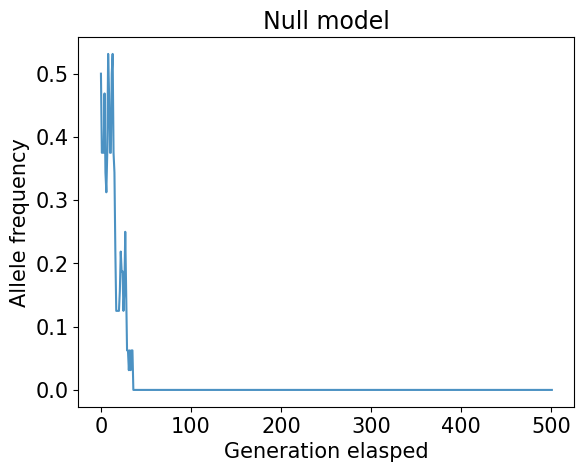

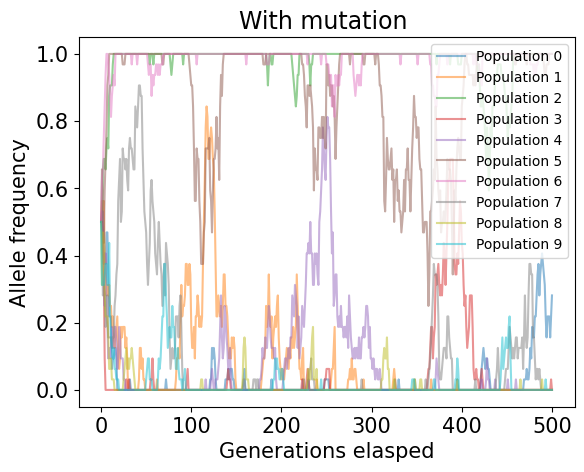

In [ ]:
frequency_array_null_model = simulate_genetic_drift(num_populations=100, num_generations=501, num_of_flies=16)
frequency_array_with_mutation = stochastic_simulation_with_mutation(mutation_prob= 0.001, num_populations=100, num_generations=501, num_of_flies=16)

plot_line_graph(frequency_array_null_model, 1, title="Null model", x_label="Generation elasped", y_label="Allele frequency")

def plot_multiple_lines_graph(frequency_array, num_populations, title, x_label, y_label):
  #generate the plot
  fig, ax = plt.subplots()

  #set title for plot and label axes
  plt.title(title, fontsize=17)
  plt.xlabel(x_label, fontsize=15)
  plt.ylabel(y_label, fontsize=15)

  #loop through the number of populations, get all the allele frequencies, and plot the values as datapoints
  for p in range(num_populations):
    plt.plot(frequency_array[p, :], '-', alpha=0.5, label="Population " + str(p))

  #set x and y ticks
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.legend(loc='upper right')
  plt.show()

plot_multiple_lines_graph(frequency_array_with_mutation, 10, title="With mutation ", x_label="Generations elasped", y_label="Allele frequency")





## Question 1g

I will define a mutation probability array with the varying values of mutation, and pass each value as a parameter into the function that simulates and fill out the frequency array. I will pass this array of frequencies due to mutation to the plot_histogram function.

From the graph, I find that the larger the mutation rate, the less likely it is for a population to reach fixation point. When the rate is 0.001, there are a small number of populations with allele frequencies in the range of 0.2-0.8. When the mutation is 0.1, the distribution of allele frequencies are roughly centered around 0.5, which makes sense since the mutation allows the recessive allele to mutate from the dominant allele and therefore over time the frequencies of two alleles are relatively balanced out.

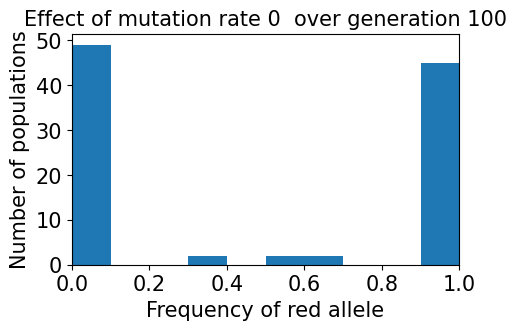

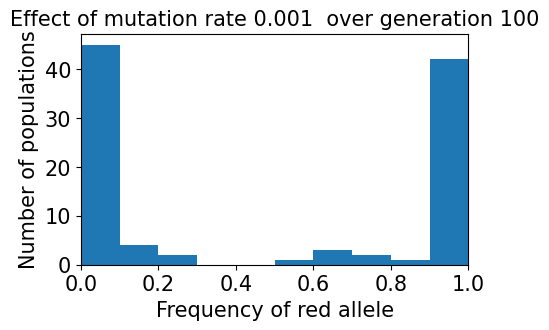

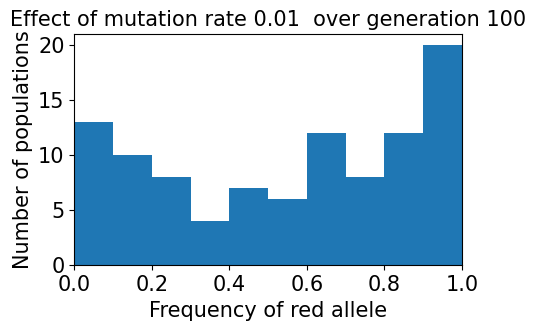

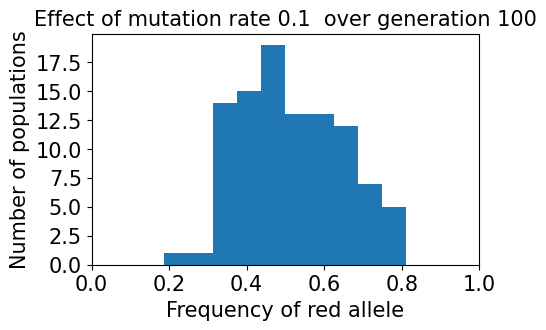

In [ ]:
mutation_probs = [0, 0.001, 0.01, 0.1]
for i in range(len(mutation_probs)):
  mutation_frequency_array = stochastic_simulation_with_mutation(mutation_prob=mutation_probs[i], num_populations=100, num_generations=500, num_of_flies=16)
  plot_histogram(generation_time_points=[100], frequency_array=mutation_frequency_array, title="Effect of mutation rate " + str(mutation_probs[i]) + " ", x_label="Frequency of red allele", y_label="Number of populations")

## Question 2c

To plot q over time, I define a function that calculates the frequency of allele p based on the time, mutation rate, and selection coefficient. I derived this equation by setting p(0) equal to 10^-9 and solve for m. 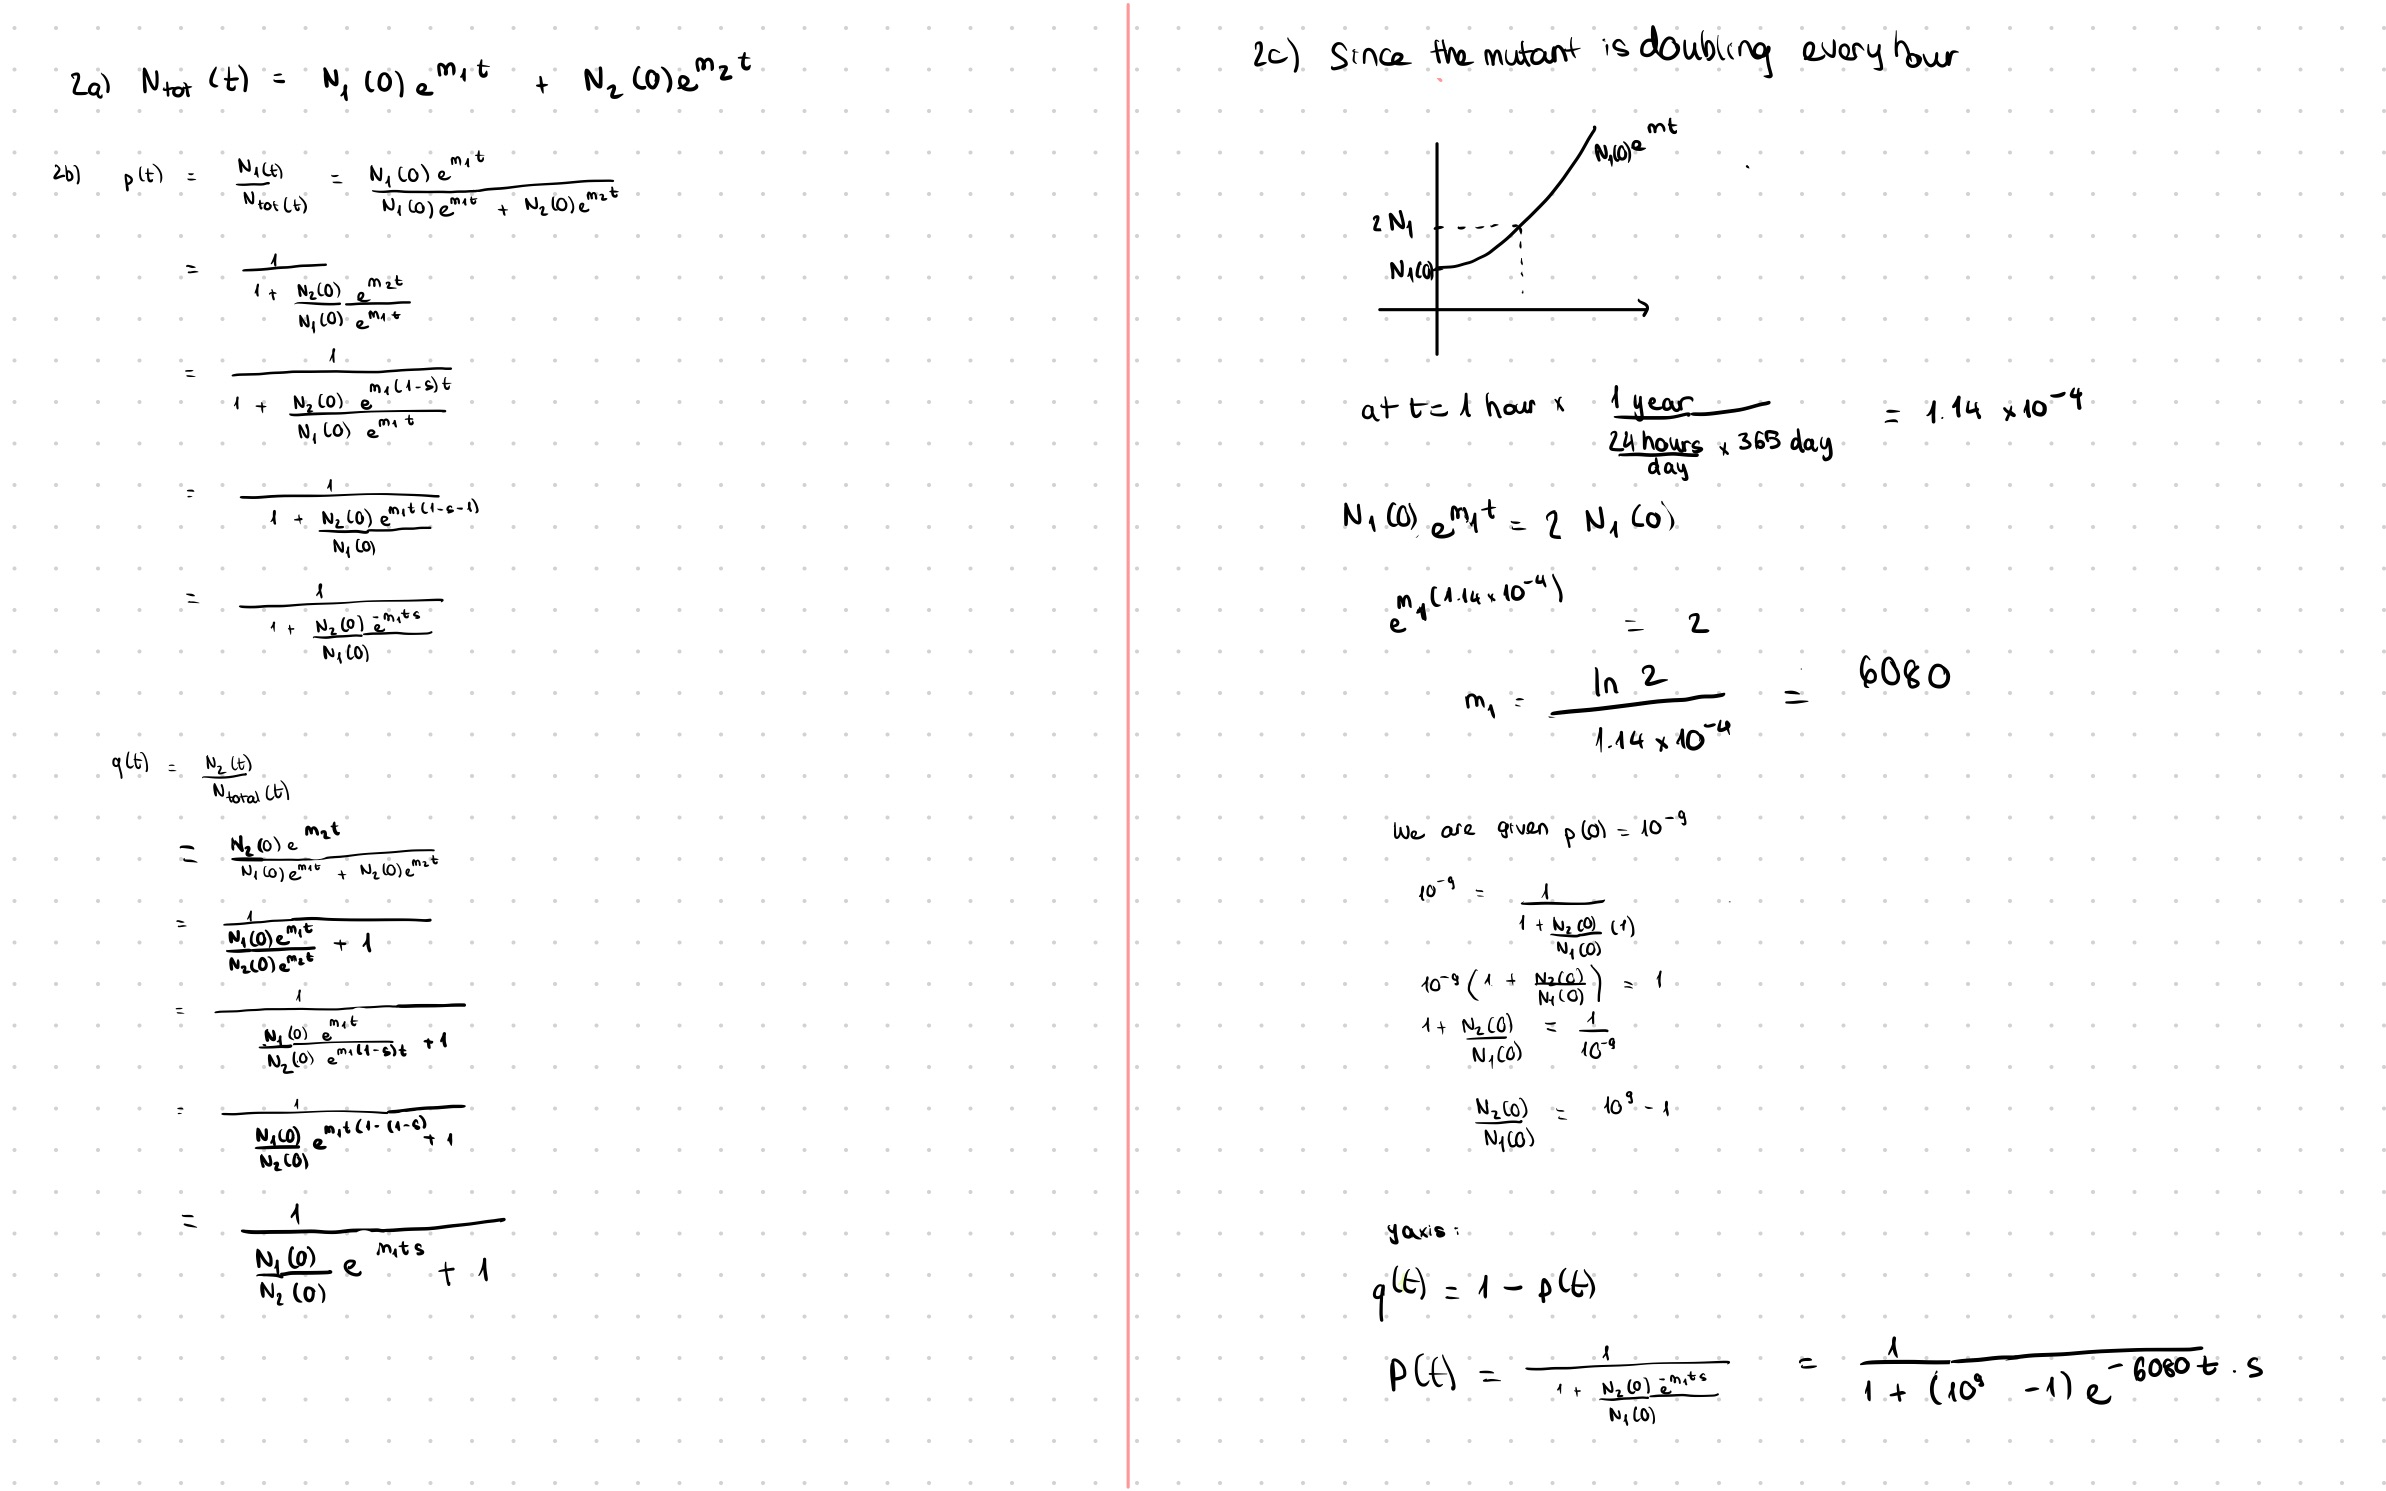



In [ ]:
def p(t, m, s):
    return 1/(1+ (pow(10, 9)-1) * pow(math.e, -1* m * t * s))

To plot p, the frequency of mutant allele over time, I create an array of representative time points and pass the time poinst into the function that calculates the frequency p. 6080 is the value of m that I solved for using the fact that the mutant doubles every hour. 



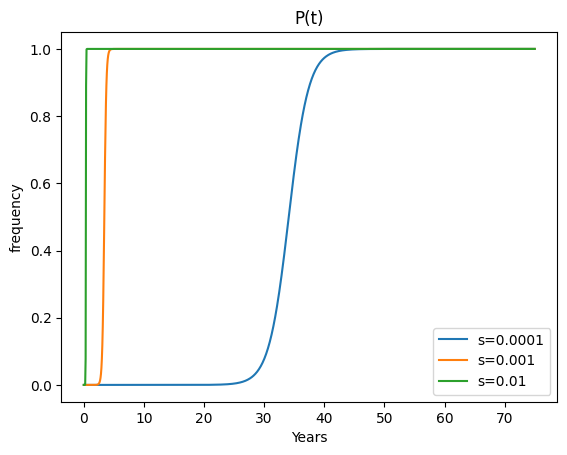

In [ ]:
t = np.linspace(0, 75, 1000)  # Range of t-values

selection_coefficients = [pow(10, -4), pow(10, -3), pow(10, -2)]  # Different selection coefficients

# Plotting the logistic functions
for s in selection_coefficients:
    y = p(t, 6080, s)
    plt.plot(t, y, label=f's={s}')

plt.xlabel('Years')
plt.ylabel('frequency')
plt.title('P(t)')
plt.legend()
plt.show()


Similarly, I loop through the different selection coefficients s and pass that in to the function that calulates q, the frequency of mutant allele A_2. I use the values to plot a graph, which I see that the smaller the selection coefficient, the more correlation of the graph is to the logistic function. 

In [ ]:
def q(t, m, s):
    return 1 - 1/(1+ (pow(10, 9)-1) * pow(math.e, -1* m * t * s))

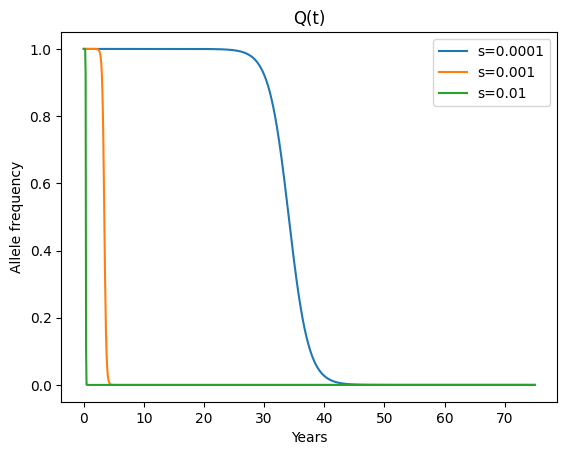

In [ ]:
t = np.linspace(0, 75, 1000)  # Range of t-values

selection_coefficients = [pow(10, -4), pow(10, -3), pow(10, -2)]  # Different selection coefficients

# Plotting the logistic functions
for s in selection_coefficients:
    y = q(t, 6080, s)
    plt.plot(t, y, label=f's={s}')

plt.xlabel('Years')
plt.ylabel('Allele frequency')
plt.title('Q(t)')
plt.legend()
plt.show()